In [1]:
#gpu가 텐서플로우에 인식되고 있는지 확인
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 405948616700879437
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6964641792
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16685621426625560888
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:06:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#데이터 전처리
#0~255까지 값을 가지는 데이터를 0~1로 리스케일링
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
#모델 구성
model = tf.keras.models.Sequential([
    #tf.keras.layers.Conv2D(32, kernel_size = (3,3), input_shape=(28,28,1), activation='relu'),
    #tf.keras.layers.MaxPooling2D(pool_size=2),
    #tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=200, validation_split=0.2)

Epoch 1/20
240/240 [==============================] - 3s 9ms/step - loss: 0.6659 - accuracy: 0.7686 - val_loss: 0.4350 - val_accuracy: 0.8468
Epoch 2/20
240/240 [==============================] - 2s 7ms/step - loss: 0.4311 - accuracy: 0.8454 - val_loss: 0.4166 - val_accuracy: 0.8437
Epoch 3/20
240/240 [==============================] - 2s 7ms/step - loss: 0.3847 - accuracy: 0.8612 - val_loss: 0.3721 - val_accuracy: 0.8617
Epoch 4/20
240/240 [==============================] - 2s 7ms/step - loss: 0.3567 - accuracy: 0.8703 - val_loss: 0.3529 - val_accuracy: 0.8705
Epoch 5/20
240/240 [==============================] - 2s 7ms/step - loss: 0.3382 - accuracy: 0.8770 - val_loss: 0.3331 - val_accuracy: 0.8792
Epoch 6/20
240/240 [==============================] - 2s 7ms/step - loss: 0.3236 - accuracy: 0.8804 - val_loss: 0.3280 - val_accuracy: 0.8820
Epoch 7/20
240/240 [==============================] - 2s 7ms/step - loss: 0.3106 - accuracy: 0.8861 - val_loss: 0.3204 - val_accuracy: 0.8833
Epoch 

In [8]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8856
0.3351496458053589 0.8855999708175659


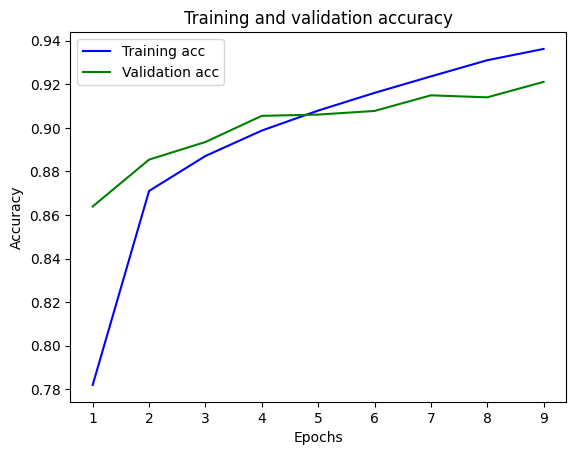

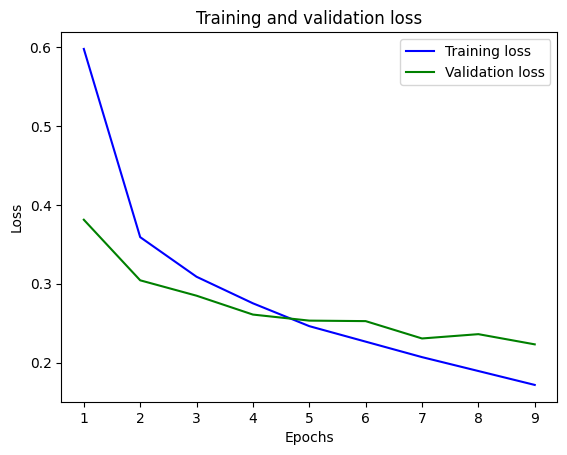

In [9]:
# Plotting Results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

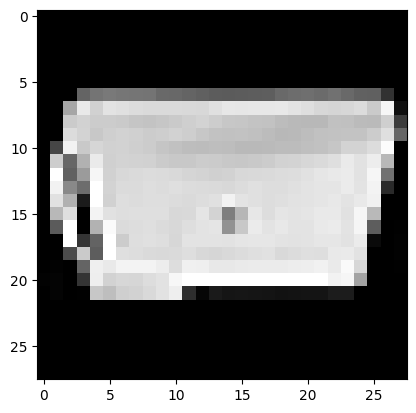

In [12]:
# pick a sample to plot
sample = 110
image = train_images[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()